In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


In [2]:
# OPEN WIND SPEED TIME SERIES
series_ws = pd.read_excel('wind_speed_main_db.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
series_ws = series_ws.dropna()

In [ ]:
#series_ws = series_ws.resample('D').mean()

In [4]:
w_s_d = pd.DataFrame(series_ws)
input_ann = pd.concat([w_s_d.shift(3),w_s_d.shift(2),w_s_d.shift(1)], axis=1)
input_ann.columns = ['t-3','t-2', 't-1']
print(input_ann.head(5))

                        t-3     t-2     t-1
Data/Hora                                  
2009-06-01 00:10:00     NaN     NaN     NaN
2009-06-01 00:20:00     NaN     NaN  8.6614
2009-06-01 00:30:00     NaN  8.6614  8.6159
2009-06-01 00:40:00  8.6614  8.6159  9.2818
2009-06-01 00:50:00  8.6159  9.2818  8.6614


In [5]:
input_ann_t = input_ann.iloc[3:,:]
output_ann_t = w_s_d.iloc[3:,:]

In [6]:
"""
X_train, X_test, y_train, y_test = train_test_split(input_ann_t, output_ann_t, test_size=0.33, random_state=42)

"""
# test_size = 73451
test_size = 83948 #500
X_train = input_ann_t[:-test_size]
X_test = input_ann_t[-test_size:]

y_train = output_ann_t[:-test_size]
y_test = output_ann_t[-test_size:]


In [7]:
regr = MLPRegressor(hidden_layer_sizes=(100,),random_state=1, max_iter=200).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#regr.n_layers_
regr.hidden_layer_sizes

(100,)

In [9]:
y_for = pd.DataFrame(regr.predict(X_test),index=y_test.index)

In [ ]:
regr.score(X_test, y_test)

0.5899840301375495

In [10]:
# MAE
def mean_absolute_error(true, pred):
    abs_error = np.abs(true - pred)
    sum_abs_error = np.sum(abs_error)
    mae_loss = sum_abs_error / true.size
    return mae_loss

#MAPE
def mean_absolute_percentage_error(true, pred):
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

#MSE
def mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    mse_loss = sum_squared_error / true.size
    return mse_loss

#RMSE
def root_mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    rmse_loss = np.sqrt(sum_squared_error / true.size)
    return rmse_loss

#RRMSE
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

In [ ]:
relative_root_mean_squared_error(y_test.iloc[:,0], y_for.iloc[:,0])

0.13093094120960624

In [11]:
# CHOOSING RRMSE METRIC AND VERIFY ITS PERFORMANCE
print("MAE: ", mean_absolute_error(y_test.iloc[:,0],y_for.iloc[:,0]))
print("MAPE: ", mean_absolute_percentage_error(y_test.iloc[:,0],y_for.iloc[:,0]))
print("MSE: ", mean_squared_error(y_test.iloc[:,0],y_for.iloc[:,0]))
print("RMSE: ", root_mean_squared_error(y_test.iloc[:,0],y_for.iloc[:,0]))
print("RRMSE: ", relative_root_mean_squared_error(y_test.iloc[:,0],y_for.iloc[:,0]))

MAE:  0.45942499468773684
MAPE:  6.0446439766819005
MSE:  0.390193956201123
RMSE:  0.6246550697794128
RRMSE:  0.0734087761895556


In [12]:
y_test_sort = y_test.iloc[:,0].sort_index()
y_for_sort = y_for.iloc[:,0].sort_index()

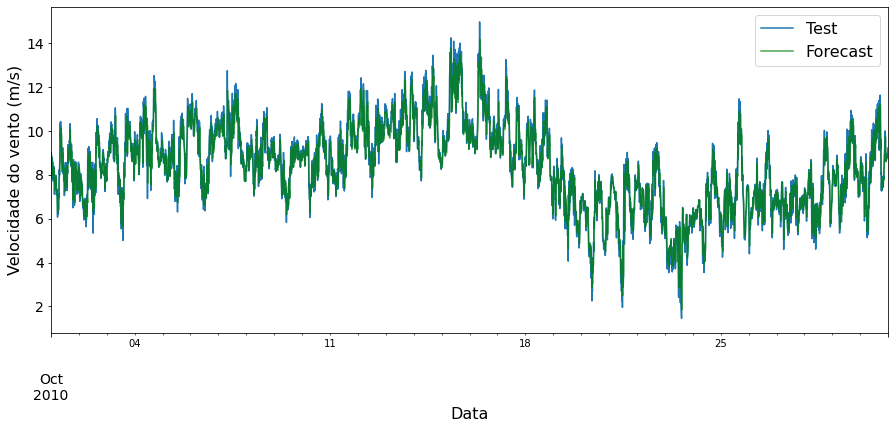

In [13]:
ax = y_test_sort['2010-10-01':'2010-10-30'].plot(label='Test')
y_for_sort['2010-10-01':'2010-10-30'].plot(figsize=(15, 6),ax=ax, label='Forecast', alpha=.7,color="green")
ax.set_xlabel('Data',fontsize=16)
plt.xticks(fontsize=14)
ax.set_ylabel("Velocidade do vento (m/s)", fontsize=16)
plt.yticks(fontsize=14)
plt.legend(prop={"size": 16})
plt.savefig('previsao_rede_neural.png', format = 'png', dpi=1200)